# Data Science Job Market Analysis Project - Web Scrapping from Naukari Website

## Web-scrapping of Data Science Job Postings from Naukari Website using Selenium

In [1]:
#Importing Necessary Libraries
import time
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = "C:\chromedriver.exe"

In [3]:
driver = webdriver.Chrome(PATH)

In [4]:
jobs={"Job_Role":[],
     "Company_name":[],
     "Location":[],
     "Desired_Experience":[],
     "Skills_Required":[],
     "Salary_Expected":[],
     "Stats":[],
     "Job_Description":[],
     "Education":[]}
link_desc={"link":[]}

In [10]:
#Extracting Separate Links(of second main page) for the Jobs posted
for i in range(5): 
        driver.get("https://www.naukri.com/data-scientist-jobs-{}".format(i))
        time.sleep(3)
        lst=driver.find_elements_by_css_selector(".jobTuple.bgWhite.br4.mb-8")

        for job in lst:
            driver.implicitly_wait(10)
            link=job.find_element_by_css_selector('a.title.fw500.ellipsis').get_attribute('href')
            link_desc["link"].append(link)

In [11]:
#Extracting Desired Content
for lnk in link_desc["link"]:
    driver.get(lnk)
    time.sleep(3)
    lst1=driver.find_elements_by_css_selector("section.jd-header")
    lst2=driver.find_elements_by_css_selector("section.job-desc")

    for x in lst1:
        role=x.find_element_by_css_selector("div.jd-top-head").text
        company=x.find_element_by_css_selector("div.jd-header-comp-name").text
        location=x.find_element_by_css_selector("div.loc").text
        exp=x.find_element_by_css_selector("div.exp").text
        salary=x.find_element_by_css_selector("div.salary").text
        stats=x.find_element_by_css_selector("div.jd-stats").text

    for y in lst2:
        skills=y.find_element_by_css_selector("div.key-skill").text
        JD=y.find_element_by_css_selector("div.dang-inner-html").text
        education=y.find_element_by_css_selector("div.education").text

    jobs["Job_Role"].append(role)
    jobs["Company_name"].append(company)
    jobs["Location"].append(location)
    jobs["Desired_Experience"].append(exp)
    jobs["Skills_Required"].append(skills)
    jobs["Stats"].append(stats)
    jobs["Salary_Expected"].append(salary)
    jobs["Job_Description"].append(JD)
    jobs["Education"].append(education)

In [27]:
#data = pd.DataFrame.from_dict(jobs)
#data.shape
#Dataset with complete Job Description
Data_with_Desc=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\P35-NLP\\Data_with_Desc.csv")
JD=Data_with_Desc["Job_Description"]

#Dataframe without JD and Stats
#Data_Scrapped=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\P35-NLP\\Data_Scrapped.csv")

#Data_with_Desc.drop(["Stats","Job_Description"], inplace=True, axis=1)
#Final_Data = Data_with_Desc.append(Data_Scrapped)
#Final_data = Final_Data.to_csv(r'C:\\Users\\dell\\OneDrive\\Desktop\\P35-NLP\\Final_data.csv', index = False)

In [2]:
Final_Data=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\P35-NLP\\Final_data.csv")

In [3]:
Final_Data.shape

(15031, 7)

In [5]:
pd.options.display.max_columns = None #Helps to see all column names in the Dataset

In [6]:
Final_Data.head()

,Job_Role,Company_name,Location,Desired_Experience,Skills_Required,Salary_Expected,Education
0,Data Scientist\nIBM India Pvt. Limited4.0(8564...,IBM India Pvt. Limited4.0(8564 Reviews),India,0 - 5 years,Key Skills\nNLPArtificial IntelligenceData Sci...,Not Disclosed,Education\nUG :Any Graduate in Any Specializat...
1,Principal Data Scientist - Machine/Deep Learni...,Fidius advisory,Bengaluru,8 - 13 years,Key Skills\nTensorflowNLPPyTorchdata sciencepr...,Not Disclosed,Education\nUG :Any Graduate in Any Specializat...
2,Data Scientist - Image Recognition/Machine Lea...,CarbyneTech India3.1(7 Reviews),Hyderabad,5 - 10 years,Key Skills\nNLPData ScientistTime Series Analy...,Not Disclosed,Education\nUG :Any Graduate in Any Specializat...
3,Data Scientist - Image Processing/Machine Lear...,CarbyneTech India3.1(7 Reviews),Hyderabad,6 - 11 years,Key Skills\nPredictive ModelingData ScienceDat...,Not Disclosed,"Education\nUG :BCA in Computers, B.A in Econom..."
4,Data Scientist - Image Processing/ Machine Lea...,CarbyneTech India3.1(7 Reviews),Hyderabad,6 - 11 years,Key Skills\nPredictive ModelingData ScienceDat...,Not Disclosed,"Education\nUG :BCA in Computers, B.Sc in Any S..."


In [7]:
Final_Data.tail()

,Job_Role,Company_name,Location,Desired_Experience,Skills_Required,Salary_Expected,Education
14626,Senior Python Developer / Team Lead\nConfidential,Confidential,Ahmedabad,2 - 7 years,Key Skills\nNltkGITLinuxDjangoCloudMachine Lea...,Not Disclosed,"Education\nUG :B.Tech/B.E. in Computers, BCA i..."
14627,Chief Project Manager\nHailstone Innovations P...,Hailstone Innovations Private Limited 3.5(12 R...,"Palakkad, Kochi, Coimbatore",10 - 15 years,Key Skills\nTeam ManagementLeadershipSAPTime M...,"₹ 20,00,000 - 22,50,000 P.A.",Education\nUG :B.Tech/B.E. in Any Specializati...
14628,"Full Stack Developer (Expertise in node.js, aw...",Nirmal Bang Group is hiring for one of its ass...,"Greater Noida, Noida",3 - 6 years,Key Skills\nNode.Js\nSoftware DevelopmentDocke...,Not Disclosed,Education\nUG :B.Tech/B.E. in Any Specializati...
14629,MIS Executive\nPeoples Mutually Aided Co Opera...,Peoples Mutually Aided Co Operative Credit Soc...,Vijayawada,1 - 6 years,Key Skills\nPivot TableSUMIFExcelVLOOKUPMIS Op...,"₹ 1,75,000 - 2,25,000 P.A.",Education\nUG :B.Com in Any Specialization
14630,Digital Marketing Specialist\nXortix Services ...,Xortix Services Pvt. Ltd.,Mohali,1 - 3 years,Key Skills\nPaid AdsDigital MarketingFacebook ...,Not Disclosed,Education\nUG :Any Graduate in Any Specialization


In [8]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 0 to 14630
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job_Role            15031 non-null  object
 1   Company_name        15031 non-null  object
 2   Location            15031 non-null  object
 3   Desired_Experience  15031 non-null  object
 4   Skills_Required     15031 non-null  object
 5   Salary_Expected     15031 non-null  object
 6   Education           15031 non-null  object
dtypes: object(7)
memory usage: 939.4+ KB


In [9]:
Final_Data.nunique()

Job_Role              9369
Company_name          4136
Location               783
Desired_Experience     141
Skills_Required       8119
Salary_Expected        328
Education             1198
dtype: int64

In [10]:
Final_Data.dtypes

Job_Role              object
Company_name          object
Location              object
Desired_Experience    object
Skills_Required       object
Salary_Expected       object
Education             object
dtype: object

In [11]:
Final_Data.describe()

,Job_Role,Company_name,Location,Desired_Experience,Skills_Required,Salary_Expected,Education
count,15031,15031,15031,15031,15031,15031,15031
unique,9369,4136,783,141,8119,328,1198
top,"Senior Consultant Strategy Consulting, Technol...",ADEEBA E SERVICES PVT LTD3.6(18 Reviews),Bengaluru,5 - 10 years,Key Skills\ntech supportBPOvoiceHelp DeskCusto...,Not Disclosed,Education\nUG :Any Graduate in Any Specializat...
freq,658,1259,3411,1350,1188,13494,5763


# Data Visualization

In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(Final_Data, title='Pandas Profiling Report', explorative=True) 

In [13]:
profile.to_widgets() #To get overview of complete Data

In [ ]:
profile.to_file(output_file=('pandas_profiling_P35.html')) # Save the report as html file 

# Data Pre-Processing

In [4]:
#Checking NA Values
Final_Data.isna().sum()

#No Missing Cells Present in Data

Job_Role              0
Company_name          0
Location              0
Desired_Experience    0
Skills_Required       0
Salary_Expected       0
Education             0
dtype: int64

In [5]:
#Checking Duplicate Values
Final_Data[Final_Data.duplicated(subset=["Job_Role","Company_name","Location","Desired_Experience","Skills_Required","Salary_Expected","Education"])].shape

(4815, 7)

In [6]:
print("Before dropping duplicates : ",Final_Data.shape)
Final_Data.drop_duplicates(keep="first",inplace=True)
print("After dropping duplicates : ",Final_Data.shape)

Before dropping duplicates :  (15031, 7)
After dropping duplicates :  (10216, 7)


In [8]:
Final_Data.shape

(10216, 7)

In [7]:
#lower case all the strings to avoid redundancy
Final_Data=Final_Data.apply(lambda x: x.astype(str).str.lower())

In [8]:
#Multiple Job locations and skill are associated to each job, so splitting 'Location' and 'Skills_Required'
Final_Data.Skills_Required=[skill.split("\n") for skill in Final_Data.Skills_Required]
Final_Data.Location=[Location.split(",") for Location in Final_Data.Location]
Final_Data.Education=[Education.split("\n") for Education in Final_Data.Education]
Final_Data[50:60]

,Job_Role,Company_name,Location,Desired_Experience,Skills_Required,Salary_Expected,Education
69,opening for senior data scientist - mumbai loc...,mahindra holidays and resorts india limited3.9...,[mumbai],6 - 11 years,"[key skills, artificial intelligencedata analy...","₹ 8,00,000 - 12,00,000 p.a.","[education, ug :b.tech/b.e. in any specializat..."
70,lets connect to explore new role : data scient...,cuelogic technologies pvt ltd4.0(28 reviews),[pune],4 - 8 years,"[key skills, deep learning frameworksalgorithm...",not disclosed,"[education, ug :any graduate in any specializa..."
71,lead data scientist - deep learning/machine le...,confidential,[bengaluru],4 - 9 years,"[key skills, ropencvdata scientistdata managem...",not disclosed,"[education, ug :b.a in economics, english, sta..."
72,chief data scientist - machine learning/ pytho...,catalyst,[bengaluru],7 - 12 years,"[key skills, data sciencerdata scientisthadoop...",not disclosed,"[education, ug :b.tech/b.e. in computers, b.sc..."
73,chief data scientist - machine learning/ pytho...,catalyst,[bengaluru],9 - 14 years,"[key skills, data scienceralgorithmsdata struc...",not disclosed,"[education, ug :any graduate in any specializa..."
74,chief data scientist - machine learning/python...,catalyst,[bengaluru],7 - 12 years,"[key skills, data scienceralgorithmsdata struc...",not disclosed,"[education, ug :b.sc in maths, computers, stat..."
75,data scientist - machine learning\ncatalyst\nh...,catalyst,[bengaluru],2 - 7 years,"[key skills, data sciencedata qualitydata scie...",not disclosed,"[education, ug :bca in computers, b.sc in any ..."
76,data scientist\naryng,aryng,[india],5 - 10 years,"[key skills, data sciencedata scientistdata ma...",not disclosed,"[education, ug :any graduate in any specializa..."
77,data scientist - r/python - iit/nit/bits\neic ...,eic tec hsys,[delhi/ncr delhi ncr],3 - 8 years,"[key skills, data sciencerelasticsearchdata sc...",not disclosed,"[education, ug :bca in computers, b.sc in any ..."
78,senior data scientist\ncognial artificial inte...,cognial artificial intelligence solutions pvt ...,[hyderabad],4 - 6 years,"[key skills, nlpmachine learninganalyticsocr]",not disclosed,"[education, ug :b.tech/b.e. in any specializat..."


In [12]:
Final_Clean = Final_Data.to_csv(r'C:\Users\dell\OneDrive\Desktop\P35-NLP\Final_Clean.csv', index = False)

# Text Mining

In [9]:
df_text=Final_Data

In [10]:
#Replacing null values by '0' string
df_text.fillna("0", inplace=True) 
df_text.isnull().sum()

Job_Role              0
Company_name          0
Location              0
Desired_Experience    0
Skills_Required       0
Salary_Expected       0
Education             0
dtype: int64

In [11]:
df_text.columns

Index(['Job_Role', 'Company_name', 'Location', 'Desired_Experience',
       'Skills_Required', 'Salary_Expected', 'Education'],
      dtype='object')

In [12]:
#######Basic feature extraction of text data########
df1=df_text[['Job_Role','Company_name','Location','Skills_Required','Education']] #Dropping two columns - 'Desired_Experience' and 'Salary_Expected'
df1.head()

,Job_Role,Company_name,Location,Skills_Required,Education
0,data scientist\nibm india pvt. limited4.0(8564...,ibm india pvt. limited4.0(8564 reviews),[india],"[key skills, nlpartificial intelligencedata sc...","[education, ug :any graduate in any specializa..."
1,principal data scientist - machine/deep learni...,fidius advisory,[bengaluru],"[key skills, tensorflownlppytorchdata sciencep...","[education, ug :any graduate in any specializa..."
2,data scientist - image recognition/machine lea...,carbynetech india3.1(7 reviews),[hyderabad],"[key skills, nlpdata scientisttime series anal...","[education, ug :any graduate in any specializa..."
3,data scientist - image processing/machine lear...,carbynetech india3.1(7 reviews),[hyderabad],"[key skills, predictive modelingdata scienceda...","[education, ug :bca in computers, b.a in econo..."
4,data scientist - image processing/ machine lea...,carbynetech india3.1(7 reviews),[hyderabad],"[key skills, predictive modelingdata scienceda...","[education, ug :bca in computers, b.sc in any ..."


### Character Count

In [17]:
df1['Job_Role_char_count']=df1.Job_Role.str.len()
df1['Company_name_char_count']=df1.Company_name.str.len()
df1['Location_char_count']=df1.Location.str.len()
df1['Skills_Required_char_count']=df1.Skills_Required.str.len()
df1['Education_char_count']=df1.Education.str.len()

<ipython-input-17-70b90633dda6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Job_Role_char_count']=df1.Job_Role.str.len()


In [20]:
df1.head()

,Job_Role,Company_name,Location,Skills_Required,Education,Job_Role_char_count,Company_name_char_count,Location_char_count,Skills_Required_char_count,Education_char_count,Job_Role_word_count,Company_name_word_count,Location_word_count,Skills_Required_word_count,Education_word_count
0,data scientist\nibm india pvt. limited4.0(8564...,ibm india pvt. limited4.0(8564 reviews),[india],"[key skills, nlpartificial intelligencedata sc...","[education, ug :any graduate in any specializa...",54,39,1,2,4,6,5,1,8,17
1,principal data scientist - machine/deep learni...,fidius advisory,[bengaluru],"[key skills, tensorflownlppytorchdata sciencep...","[education, ug :any graduate in any specializa...",81,15,1,2,3,9,2,1,6,14
2,data scientist - image recognition/machine lea...,carbynetech india3.1(7 reviews),[hyderabad],"[key skills, nlpdata scientisttime series anal...","[education, ug :any graduate in any specializa...",83,31,1,2,4,8,3,1,12,24
3,data scientist - image processing/machine lear...,carbynetech india3.1(7 reviews),[hyderabad],"[key skills, predictive modelingdata scienceda...","[education, ug :bca in computers, b.a in econo...",82,31,1,2,4,8,3,1,12,28
4,data scientist - image processing/ machine lea...,carbynetech india3.1(7 reviews),[hyderabad],"[key skills, predictive modelingdata scienceda...","[education, ug :bca in computers, b.sc in any ...",83,31,1,2,4,9,3,1,13,23


### Word Count

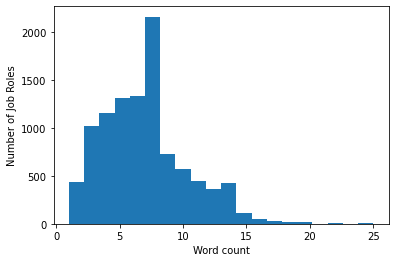

In [25]:
df1['Job_Role_word_count']=df1.Job_Role.apply(lambda x: len(str(x).split(" ")))
df1['Company_name_word_count']=df1.Company_name.apply(lambda x: len(str(x).split(" ")))
df1['Location_word_count']=df1.Location.apply(lambda x: len(str(x).split(" ")))
df1['Skills_Required_word_count']=df1.Skills_Required.apply(lambda x: len(str(x).split(" ")))
df1['Education_word_count']=df1.Education.apply(lambda x: len(str(x).split(" ")))

plt.hist(x='Job_Role_word_count', data=df1, bins=20)
plt.xlabel('Word count')
plt.ylabel('Number of Job Roles')
plt.figsize=(10, 16)

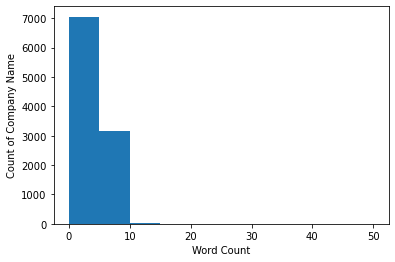

In [28]:
plt.hist(x='Company_name_word_count', data=df1, bins=[0,5,10,15,20,25,30,35,40,45,50])
plt.xlabel('Word Count')
plt.ylabel('Count of Company Name')
plt.figsize=(5, 7)

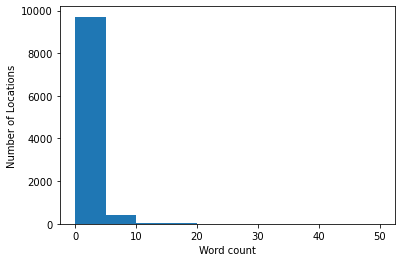

In [30]:
plt.hist(x='Location_word_count', data=df1, bins=[0,5,10,15,20,25,30,35,40,45,50])
plt.xlabel('Word count')
plt.ylabel('Number of Locations')
plt.figsize=(10, 16)

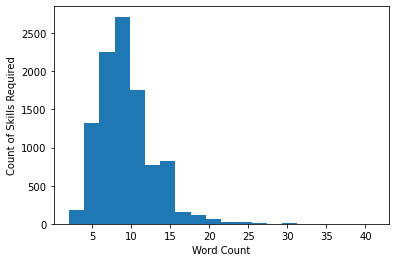

In [31]:
plt.hist(x='Skills_Required_word_count', data=df1, bins=20)
plt.xlabel('Word Count')
plt.ylabel('Count of Skills Required')
plt.figsize=(10, 16)

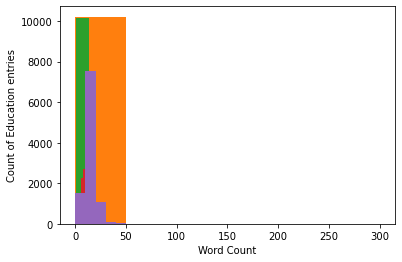

In [24]:
plt.hist(x='Education_word_count', data=df1, bins=[0,10,20,30,40,50,60])
plt.xlabel('Word Count')
plt.ylabel('Count of Education entries')
plt.figsize=(5, 10)

### Average word length

In [33]:
def avg_word(sentence):
    words=sentence.split(" ")
    return(sum(len(word) for word in words)/len(words))

In [37]:
df1['Job_Role_avg_word']=df1.Job_Role.apply(lambda x: avg_word(x))
df1['Company_avg_word']=df1.Company_name.apply(lambda x: avg_word(x))

In [43]:
df1.head()

,Job_Role,Company_name,Location,Skills_Required,Education,Job_Role_char_count,Company_name_char_count,Location_char_count,Skills_Required_char_count,Education_char_count,...,Location_word_count,Skills_Required_word_count,Education_word_count,Job_Role_avg_word,Company_avg_word,Job_Role_special,Company_name_special,Location_special,Skills_Required_special,Education_special
0,data scientist\nibm india pvt. limited4.0(8564...,ibm india pvt. limited4.0(8564 reviews),[india],"[key skills, nlpartificial intelligencedata sc...","[education, ug :any graduate in any specializa...",54,39,1,2,4,...,1,8,17,8.166667,7.000000,2,2,0,0,0
1,principal data scientist - machine/deep learni...,fidius advisory,[bengaluru],"[key skills, tensorflownlppytorchdata sciencep...","[education, ug :any graduate in any specializa...",81,15,1,2,3,...,1,6,14,8.111111,7.000000,2,0,0,0,0
2,data scientist - image recognition/machine lea...,carbynetech india3.1(7 reviews),[hyderabad],"[key skills, nlpdata scientisttime series anal...","[education, ug :any graduate in any specializa...",83,31,1,2,4,...,1,12,24,9.500000,9.666667,2,1,0,0,0
3,data scientist - image processing/machine lear...,carbynetech india3.1(7 reviews),[hyderabad],"[key skills, predictive modelingdata scienceda...","[education, ug :bca in computers, b.a in econo...",82,31,1,2,4,...,1,12,28,9.375000,9.666667,2,1,0,0,0
4,data scientist - image processing/ machine lea...,carbynetech india3.1(7 reviews),[hyderabad],"[key skills, predictive modelingdata scienceda...","[education, ug :bca in computers, b.sc in any ...",83,31,1,2,4,...,1,13,23,8.333333,9.666667,2,1,0,0,0


### Basic text preprocessing

In [55]:
## Removing punctuations
df1['JOB_ROLE']=df1['Job_Role'].str.replace('[^\w\s]','')
df1['COMPANY']=df1['Company_name'].str.replace('[^\w\s]','')

##Removal of digits
df1['JOB_ROLE']=df1['JOB_ROLE'].str.replace('\d+', '')
df1['COMPANY']=df1['COMPANY'].str.replace('\d+', '')

##Removal of white spaces 
df1['JOB_ROLE']=df1['JOB_ROLE'].str.strip()
df1['COMPANY']=df1['COMPANY'].str.strip()

##Lemmatization
lemmatizer=WordNetLemmatizer()
 
df1['JOB_ROLE'] = df1['JOB_ROLE'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df1['COMPANY']=df1['COMPANY'].apply(lambda x: " ".join([lemmatizer.lemmatize(word)for word in x.split()]))

###Top 10 most frequent repeated words in JOB_ROLE
freq1 = pd.Series(' '.join(df1['JOB_ROLE']).split()).value_counts()[:10]
freq1

review      4286
data        3712
ltd         2690
pvt         2555
engineer    2021
analyst     1792
service     1456
for         1215
limited     1200
senior      1060
dtype: int64

In [56]:
###Top 10 most frequent repeated words in COMPANY
freq2 = pd.Series(' '.join(df1['COMPANY']).split()).value_counts()[:10]
freq2

review        4284
ltd           2674
pvt           2540
service       1349
limited       1196
private        886
india          805
solution       787
technology     739
e              630
dtype: int64

#### Parts of speech tagging

In [61]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [62]:
def pos_tagging(text):
`    text_split=" ".join(text)
    text_splitted=text_split.split()
    text_splitted=[s for s in text_splitted if s]
    pos_list = nltk.pos_tag(text_splitted)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    print(pos_list)
    print("Noun_count:", noun_count)
    print("adjective_count:" ,adjective_count)
    print("verb_count:" ,verb_count )

In [63]:
pos_tagging(df1['JOB_ROLE'])
pos_tagging(df1['COMPANY'])

[('data', 'NNS'), ('scientist', 'NN'), ('ibm', 'IN'), ('india', 'NN'), ('pvt', 'NN'), ('limited', 'VBD'), ('review', 'NN'), ('principal', 'JJ'), ('data', 'NNS'), ('scientist', 'NN'), ('machinedeep', 'NN'), ('learning', 'VBG'), ('nlptensorflow', 'JJ'), ('fidius', 'JJ'), ('advisory', 'JJ'), ('data', 'NNS'), ('scientist', 'NN'), ('image', 'NN'), ('recognitionmachine', 'NN'), ('learning', 'VBG'), ('carbynetech', 'JJ'), ('india', 'JJ'), ('review', 'NN'), ('data', 'NNS'), ('scientist', 'NN'), ('image', 'NN'), ('processingmachine', 'NN'), ('learning', 'VBG'), ('carbynetech', 'JJ'), ('india', 'JJ'), ('review', 'NN'), ('data', 'NNS'), ('scientist', 'NN'), ('image', 'NN'), ('processing', 'NN'), ('machine', 'NN'), ('learning', 'VBG'), ('carbynetech', 'JJ'), ('india', 'JJ'), ('review', 'NN'), ('data', 'NNS'), ('scientist', 'NN'), ('machine', 'NN'), ('learningapics', 'NNS'), ('carbynetech', 'VBP'), ('india', 'JJ'), ('review', 'NN'), ('jr', 'NN'), ('data', 'NNS'), ('scientist', 'NN'), ('wing', 'VBG'

[('ibm', 'JJ'), ('india', 'NN'), ('pvt', 'NN'), ('limited', 'VBD'), ('review', 'NN'), ('fidius', 'NN'), ('advisory', 'JJ'), ('carbynetech', 'NN'), ('india', 'NN'), ('review', 'NN'), ('carbynetech', 'NN'), ('india', 'NN'), ('review', 'NN'), ('carbynetech', 'NN'), ('india', 'NN'), ('review', 'NN'), ('carbynetech', 'NN'), ('india', 'NN'), ('review', 'NN'), ('wing', 'VBG'), ('infonet', 'JJ'), ('pvt', 'NN'), ('ltd', 'NN'), ('review', 'NN'), ('general', 'JJ'), ('mill', 'NN'), ('review', 'NN'), ('ganit', 'NN'), ('business', 'NN'), ('solution', 'NN'), ('private', 'JJ'), ('limited', 'JJ'), ('bundl', 'NN'), ('technology', 'NN'), ('pvt', 'NN'), ('ltd', 'NN'), ('review', 'NN'), ('adf', 'NN'), ('data', 'NNS'), ('science', 'NN'), ('private', 'JJ'), ('limited', 'JJ'), ('review', 'NN'), ('randstad', 'NN'), ('india', 'JJ'), ('pvt', 'NN'), ('ltd', 'NN'), ('review', 'NN'), ('ormae', 'IN'), ('llp', 'JJ'), ('sutherland', 'NN'), ('global', 'JJ'), ('service', 'NN'), ('inc', 'NN'), ('benovymed', 'VBD'), ('hea

### Bigrams

In [68]:
from textblob import TextBlob 
import collections

In [69]:
#JOB_ROLE
for i in df1['JOB_ROLE'][0:10]:
    grams=TextBlob(i).ngrams(2)
    print(grams)

counts = collections.Counter()
for i in df1['JOB_ROLE']:
    words1 =i.split()
    counts.update(nltk.bigrams(words1))
    
common_bigrams = counts.most_common(10)
common_bigrams

[WordList(['data', 'scientist']), WordList(['scientist', 'ibm']), WordList(['ibm', 'india']), WordList(['india', 'pvt']), WordList(['pvt', 'limited']), WordList(['limited', 'review'])]
[WordList(['principal', 'data']), WordList(['data', 'scientist']), WordList(['scientist', 'machinedeep']), WordList(['machinedeep', 'learning']), WordList(['learning', 'nlptensorflow']), WordList(['nlptensorflow', 'fidius']), WordList(['fidius', 'advisory'])]
[WordList(['data', 'scientist']), WordList(['scientist', 'image']), WordList(['image', 'recognitionmachine']), WordList(['recognitionmachine', 'learning']), WordList(['learning', 'carbynetech']), WordList(['carbynetech', 'india']), WordList(['india', 'review'])]
[WordList(['data', 'scientist']), WordList(['scientist', 'image']), WordList(['image', 'processingmachine']), WordList(['processingmachine', 'learning']), WordList(['learning', 'carbynetech']), WordList(['carbynetech', 'india']), WordList(['india', 'review'])]
[WordList(['data', 'scientist']

[(('pvt', 'ltd'), 2469),
 (('ltd', 'review'), 1598),
 (('private', 'limited'), 862),
 (('data', 'engineer'), 830),
 (('data', 'scientist'), 813),
 (('service', 'pvt'), 809),
 (('hiring', 'for'), 775),
 (('e', 'service'), 629),
 (('adeeba', 'e'), 628),
 (('limited', 'review'), 619)]

In [70]:
#COMPANY
for i in df1['COMPANY'][0:10]:
    grams=TextBlob(i).ngrams(2)
    print(grams)

counts = collections.Counter()
for i in df1['COMPANY']:
    words1 =i.split()
    counts.update(nltk.bigrams(words1))
    
common_bigrams = counts.most_common(10)
common_bigrams

[WordList(['ibm', 'india']), WordList(['india', 'pvt']), WordList(['pvt', 'limited']), WordList(['limited', 'review'])]
[WordList(['fidius', 'advisory'])]
[WordList(['carbynetech', 'india']), WordList(['india', 'review'])]
[WordList(['carbynetech', 'india']), WordList(['india', 'review'])]
[WordList(['carbynetech', 'india']), WordList(['india', 'review'])]
[WordList(['carbynetech', 'india']), WordList(['india', 'review'])]
[WordList(['wing', 'infonet']), WordList(['infonet', 'pvt']), WordList(['pvt', 'ltd']), WordList(['ltd', 'review'])]
[WordList(['general', 'mill']), WordList(['mill', 'review'])]
[WordList(['ganit', 'business']), WordList(['business', 'solution']), WordList(['solution', 'private']), WordList(['private', 'limited'])]
[WordList(['bundl', 'technology']), WordList(['technology', 'pvt']), WordList(['pvt', 'ltd']), WordList(['ltd', 'review'])]


[(('pvt', 'ltd'), 2456),
 (('ltd', 'review'), 1598),
 (('private', 'limited'), 858),
 (('service', 'pvt'), 807),
 (('e', 'service'), 628),
 (('adeeba', 'e'), 627),
 (('limited', 'review'), 619),
 (('india', 'pvt'), 353),
 (('consulting', 'pvt'), 247),
 (('technology', 'pvt'), 200)]

### Sentiment Analysis

In [71]:
df1['Role_sentiment'] = df1['JOB_ROLE'].apply(lambda x: TextBlob(x).sentiment[0] )
df1[['JOB_ROLE','Role_sentiment']].head()

,JOB_ROLE,Role_sentiment
0,data scientist ibm india pvt limited review,-0.071429
1,principal data scientist machinedeep learning ...,0.000000
2,data scientist image recognitionmachine learni...,0.000000
3,data scientist image processingmachine learnin...,0.000000
4,data scientist image processing machine learni...,0.000000


In [72]:
df1['Company_sentiment']=df1['COMPANY'].apply(lambda x: TextBlob(x).sentiment[0])
df1[['COMPANY','Company_sentiment']].head()

,COMPANY,Company_sentiment
0,ibm india pvt limited review,-0.071429
1,fidius advisory,0.000000
2,carbynetech india review,0.000000
3,carbynetech india review,0.000000
4,carbynetech india review,0.000000


In [73]:
print('5 random Job Roles with the highest Positive sentiment polarity: \n')
most_positive = df1.loc[df1.Role_sentiment == 1, ['JOB_ROLE']].sample(5).values
for c in most_positive:
    print(c[0])

5 random Job Roles with the highest Positive sentiment polarity: 

join to get an excellent pay package adeeba e service pvt ltd review
tsr cce with best salary package adeeba e service pvt ltd review
telecaller i perfect online pvt ltd
tsr cce with best salary package adeeba e service pvt ltd review
excellent opportunity for data engineer with an ibank skillventory


In [74]:
print('5 random Company Names with the highest Positive sentiment polarity: \n')
most_positive = df1.loc[df1.Company_sentiment == 1, ['COMPANY']].sample(5).values
for c in most_positive:
    print(c[0])

5 random Company Names with the highest Positive sentiment polarity: 

best it quest pvt ltd
excellent opportunity placement
i perfect online pvt ltd
best infosystems ltd review
best it quest pvt ltd


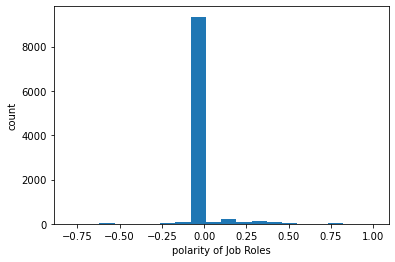

In [80]:
plt.hist(x='Role_sentiment', data=df1, bins=20);
plt.xlabel('polarity of Job Roles');
plt.ylabel('count'); 
plt.figsize=(10, 12)

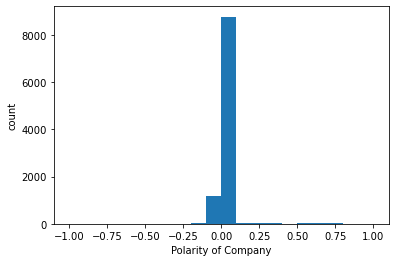

In [82]:
plt.hist(x='Company_sentiment', data=df1, bins=20);
plt.xlabel('Polarity of Company');
plt.ylabel('count'); 
plt.figsize=(10, 12)

## Forming Word Cloud for Job_Description Column

In [39]:
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [44]:
#from nltk.corpus import stopwords 
#nltk.download('stopwords') 
#stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
######################## Basic text preprocessing ########################## 
JD=JD.apply(lambda x:" ".join(x.lower() for x in x.split())) ##Lower case###
JD=JD.str.replace('[^\w\s]','')  ## Removing punctuations
JD=JD.str.replace('\d+', '')  ##Removal of digits
JD=JD.str.strip()  ##Removal of white spaces

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
##Lemmatization
lemmatizer=WordNetLemmatizer()
JD = JD.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [48]:
###top 10 most frequent repeated words in Job_Description
freq1 = pd.Series(' '.join(JD).split()).value_counts()[:10]
freq1

and           5634
to            2935
data          2708
of            2400
in            2229
a             2059
the           1986
with          1790
experience    1455
for           1028
dtype: int64

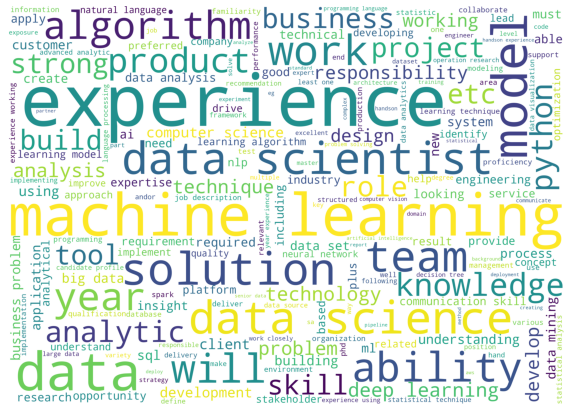

In [29]:
########### Wordcloud generation ###############
Description_text = ' '.join(JD)
Description_wordcloud=WordCloud(background_color='white',width=3500,height=2500).generate(Description_text)
fig = plt.figure(figsize = (10, 15))
plt.axis('off')
plt.imshow(Description_wordcloud)